In [3]:
# imports
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpd 
from bs4 import BeautifulSoup
import sqlite3
import requests
import numpy as np
import seaborn as sns

In [4]:
SQL_PATH = os.path.join("dwh.sqlite3") #originaldatenbank einlesen!

In [5]:
# sql connection
connection = sqlite3.connect(SQL_PATH)

In [6]:
df = pd.read_sql_query("SELECT * FROM wordcount limit 10", connection)
df.head()

,count,word,paper,date
0,84,bilder,sz,2021-03-03
1,59,sz,sz,2021-03-03
2,40,gutschein,sz,2021-03-03
3,32,plus,sz,2021-03-03
4,23,momentaufnahmen,sz,2021-03-03


In [7]:
df = pd.read_sql_query('SELECT * FROM wordcount WHERE word = "corona" ', connection)
df.head()

,count,word,paper,date
0,7,corona,sz,2021-03-03
1,1,corona,zeit,2021-03-03
2,4,corona,faz,2021-03-03
3,2,corona,heise,2021-03-03
4,4,corona,tagesspiegel,2021-03-03


In [8]:
df = pd.read_sql_query('SELECT sum(count), word, date FROM wordcount where word = "corona" group by word, date', connection)
df.head(10)

,sum(count),word,date
0,160,corona,2021-03-03
1,192,corona,2021-03-04
2,202,corona,2021-03-05
3,188,corona,2021-03-06
4,85,corona,2021-03-07
5,104,corona,2021-03-08
6,94,corona,2021-03-09
7,92,corona,2021-03-10
8,106,corona,2021-03-11
9,101,corona,2021-03-12


In [9]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df.head()

,sum(count),word,date
0,160,corona,2021-03-03
1,192,corona,2021-03-04
2,202,corona,2021-03-05
3,188,corona,2021-03-06
4,85,corona,2021-03-07


In [10]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "impfpflicht" 
GROUP BY count, word
"""

df = pd.read_sql_query(statement, connection)
df.head(30)

,sum(count),word,date
0,950,impfpflicht,2021-03-03
1,1174,impfpflicht,2021-03-20
2,876,impfpflicht,2021-03-05
3,788,impfpflicht,2021-05-26
4,545,impfpflicht,2021-07-11
5,360,impfpflicht,2021-07-13
6,301,impfpflicht,2021-07-14
7,232,impfpflicht,2021-11-17
8,144,impfpflicht,2021-07-13
9,140,impfpflicht,2021-11-10


In [11]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "omicron" 
GROUP BY word, count
"""

df = pd.read_sql_query(statement, connection)
df.head(10)

,sum(count),word,date
0,152,omicron,2021-11-28
1,172,omicron,2021-11-27
2,213,omicron,2021-11-27
3,144,omicron,2021-11-28
4,180,omicron,2021-11-30
5,150,omicron,2021-11-30
6,154,omicron,2021-12-01
7,152,omicron,2021-11-28
8,81,omicron,2021-11-29
9,70,omicron,2021-12-01


In [63]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "impfpflicht" 
GROUP BY word, count
"""

df = pd.read_sql_query(statement, connection)
df.head(10)

,sum(count),word,date
0,950,impfpflicht,2021-03-03
1,1174,impfpflicht,2021-03-20
2,876,impfpflicht,2021-03-05
3,788,impfpflicht,2021-05-26
4,545,impfpflicht,2021-07-11
5,360,impfpflicht,2021-07-13
6,301,impfpflicht,2021-07-14
7,232,impfpflicht,2021-11-17
8,144,impfpflicht,2021-07-13
9,140,impfpflicht,2021-11-10


In [13]:
df.sort_values(by=['sum(count)'], ascending=False)

,sum(count),word,date
1,1174,impfpflicht,2021-03-20
0,950,impfpflicht,2021-03-03
2,876,impfpflicht,2021-03-05
3,788,impfpflicht,2021-05-26
4,545,impfpflicht,2021-07-11
5,360,impfpflicht,2021-07-13
6,301,impfpflicht,2021-07-14
7,232,impfpflicht,2021-11-17
8,144,impfpflicht,2021-07-13
13,140,impfpflicht,2021-07-27


In [14]:
df.sort_values(by=['date'], ascending=False)

,sum(count),word,date
14,15,impfpflicht,2022-02-08
15,48,impfpflicht,2022-01-11
17,18,impfpflicht,2021-12-02
16,17,impfpflicht,2021-12-02
18,42,impfpflicht,2021-11-20
12,52,impfpflicht,2021-11-20
10,110,impfpflicht,2021-11-19
7,232,impfpflicht,2021-11-17
9,140,impfpflicht,2021-11-10
13,140,impfpflicht,2021-07-27


In [15]:
data = pd.read_csv("coronaglobal.csv")
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [16]:
data.loc[data['Country'] == 'Germany']

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
67626,2020-01-03,DE,Germany,EURO,0,0,0,0
67627,2020-01-04,DE,Germany,EURO,1,1,0,0
67628,2020-01-05,DE,Germany,EURO,0,1,0,0
67629,2020-01-06,DE,Germany,EURO,0,1,0,0
67630,2020-01-07,DE,Germany,EURO,0,1,0,0
...,...,...,...,...,...,...,...,...
68488,2022-05-14,DE,Germany,EURO,56045,25748627,13,137863
68489,2022-05-15,DE,Germany,EURO,19470,25768097,2,137865
68490,2022-05-16,DE,Germany,EURO,9800,25777897,5,137870
68491,2022-05-17,DE,Germany,EURO,62185,25840082,15,137885


In [17]:
#data.loc['2020-04-03':'2021-04-17']
#data.head()

<AxesSubplot:>

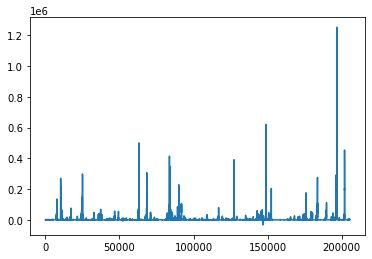

In [18]:
data["New_cases"].plot.line()

<AxesSubplot:>

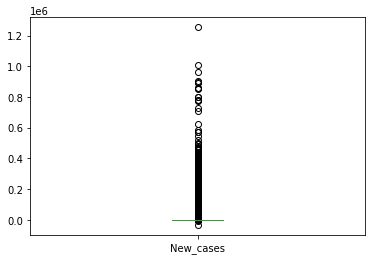

In [19]:
data["New_cases"].plot.box()

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

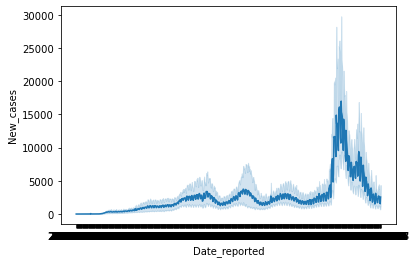

In [20]:
sns.lineplot(x=data["Date_reported"], y=data["New_cases"])

In [21]:
#day_count = data["date"].value_counts()
#day_count

<AxesSubplot:xlabel='Date_reported', ylabel='New_deaths'>

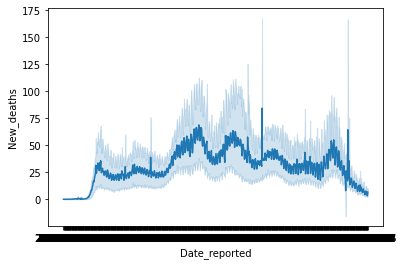

In [22]:
sns.lineplot(x=data["Date_reported"], y=data["New_deaths"])

<AxesSubplot:xlabel='date'>

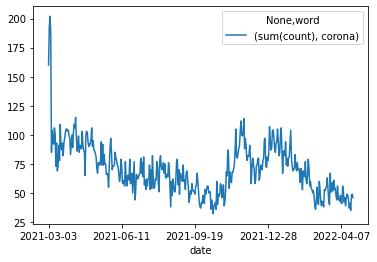

In [23]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

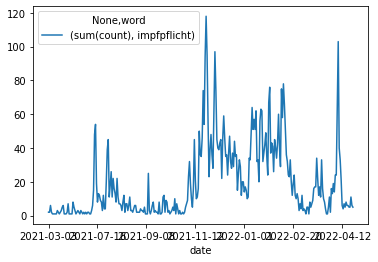

In [24]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "impfpflicht" 
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

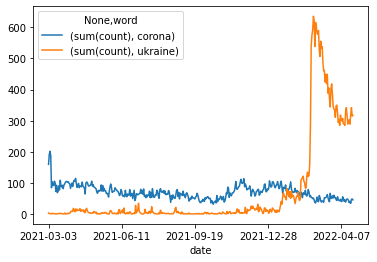

In [25]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
OR word = "ukraine"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

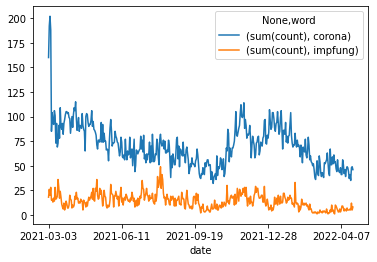

In [26]:

statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
OR word = "impfung"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

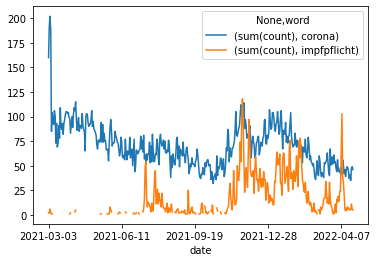

In [27]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "impfpflicht" 
OR word = "corona"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

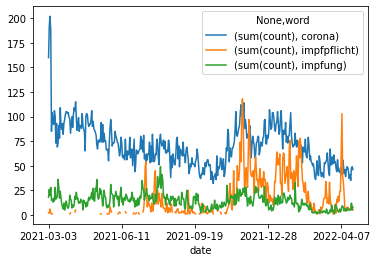

In [28]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
OR word = "impfung"
OR word = "impfpflicht"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

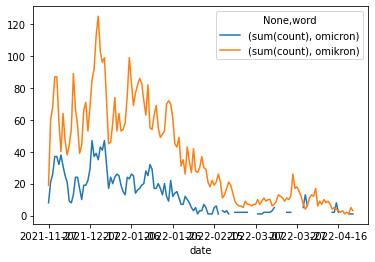

In [62]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "omicron" 
OR word = "omikron"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

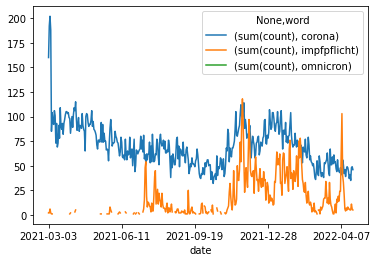

In [29]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
OR word = "omnicron"
OR word = "impfpflicht"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

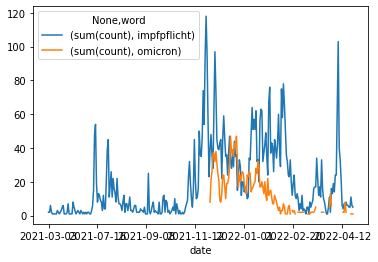

In [61]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "omicron" 
OR word = "impfpflicht"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

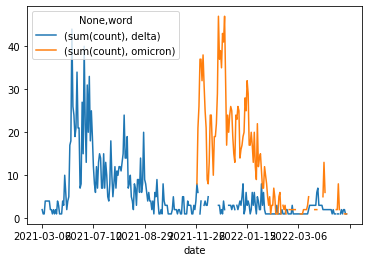

In [31]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "delta" 
OR word = "omicron"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

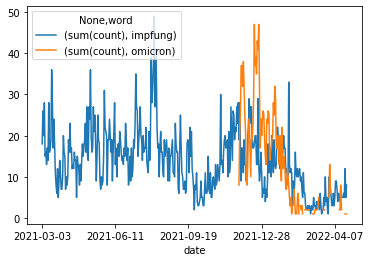

In [33]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "omicron" 
OR word = "impfung"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

<AxesSubplot:xlabel='date'>

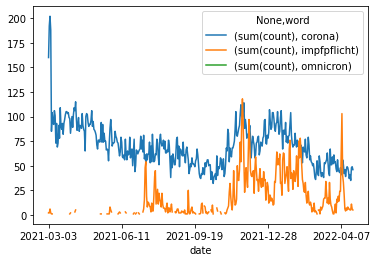

In [34]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "corona" 
OR word = "omnicron"
OR word = "impfpflicht"
GROUP BY word, date
"""

df = pd.read_sql_query(statement, connection)
df = df.set_index(["word", "date"]).unstack("word")
df.head()
df.plot()

In [35]:
statement = """
SELECT sum(count), word, date 
FROM wordcount 
WHERE word = "impfpflicht"
GROUP BY word, count
"""

df = pd.read_sql_query(statement, connection)
df.head(10)

,sum(count),word,date
0,950,impfpflicht,2021-03-03
1,1174,impfpflicht,2021-03-20
2,876,impfpflicht,2021-03-05
3,788,impfpflicht,2021-05-26
4,545,impfpflicht,2021-07-11
5,360,impfpflicht,2021-07-13
6,301,impfpflicht,2021-07-14
7,232,impfpflicht,2021-11-17
8,144,impfpflicht,2021-07-13
9,140,impfpflicht,2021-11-10


In [36]:
df["sum(count)"].value_counts(sort=False)

950     1
1174    1
876     1
788     1
545     1
360     1
301     1
232     1
144     1
140     2
110     1
60      1
52      1
15      1
48      1
17      1
18      1
42      1
Name: sum(count), dtype: int64

In [40]:
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [41]:
data = data.rename(columns={"Date_reported": "date"}, errors="raise")
data.head()

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [42]:
data_germany = data.loc[data['Country'] == 'Germany']
data_germany.head()

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
67626,2020-01-03,DE,Germany,EURO,0,0,0,0
67627,2020-01-04,DE,Germany,EURO,1,1,0,0
67628,2020-01-05,DE,Germany,EURO,0,1,0,0
67629,2020-01-06,DE,Germany,EURO,0,1,0,0
67630,2020-01-07,DE,Germany,EURO,0,1,0,0


In [43]:
df.head()

,sum(count),word,date
0,950,impfpflicht,2021-03-03
1,1174,impfpflicht,2021-03-20
2,876,impfpflicht,2021-03-05
3,788,impfpflicht,2021-05-26
4,545,impfpflicht,2021-07-11


In [44]:
output1 = pd.merge(data_germany, df,    
                   how='inner') 
  
print(output1) 

          date Country_code  Country WHO_region  New_cases  Cumulative_cases  \
0   2021-03-03           DE  Germany       EURO      10967           2461573   
1   2021-03-05           DE  Germany       EURO      10135           2483024   
2   2021-03-20           DE  Germany       EURO      15714           2649219   
3   2021-05-26           DE  Germany       EURO       3672           3654882   
4   2021-07-11           DE  Germany       EURO        789           3735849   
5   2021-07-13           DE  Germany       EURO        800           3736960   
6   2021-07-13           DE  Germany       EURO        800           3736960   
7   2021-07-14           DE  Germany       EURO       1764           3738724   
8   2021-07-14           DE  Germany       EURO       1764           3738724   
9   2021-07-27           DE  Germany       EURO       1663           3759571   
10  2021-11-10           DE  Germany       EURO      47170           4867426   
11  2021-11-17           DE  Germany    

In [53]:
output1.head(40)

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,sum(count),word
0,2021-03-03,DE,Germany,EURO,10967,2461573,196,77531,950,impfpflicht
1,2021-03-05,DE,Germany,EURO,10135,2483024,166,77866,876,impfpflicht
2,2021-03-20,DE,Germany,EURO,15714,2649219,196,80344,1174,impfpflicht
3,2021-05-26,DE,Germany,EURO,3672,3654882,52,91997,788,impfpflicht
4,2021-07-11,DE,Germany,EURO,789,3735849,6,92515,545,impfpflicht
5,2021-07-13,DE,Germany,EURO,800,3736960,4,92519,360,impfpflicht
6,2021-07-13,DE,Germany,EURO,800,3736960,4,92519,144,impfpflicht
7,2021-07-14,DE,Germany,EURO,1764,3738724,6,92525,301,impfpflicht
8,2021-07-14,DE,Germany,EURO,1764,3738724,6,92525,60,impfpflicht
9,2021-07-27,DE,Germany,EURO,1663,3759571,5,92589,140,impfpflicht


<AxesSubplot:xlabel='date', ylabel='sum(count)'>

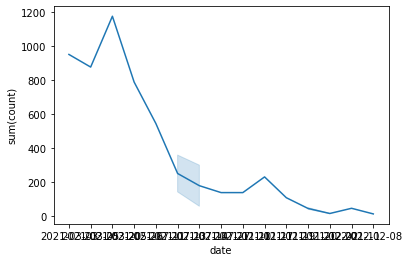

In [49]:
sns.lineplot(x=output1["date"], y=output1["sum(count)"])

<AxesSubplot:xlabel='date', ylabel='New_cases'>

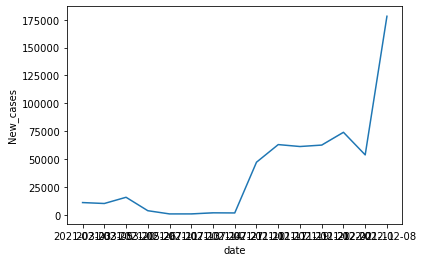

In [50]:
sns.lineplot(x=output1["date"], y=output1["New_cases"])

<AxesSubplot:xlabel='date', ylabel='New_deaths'>

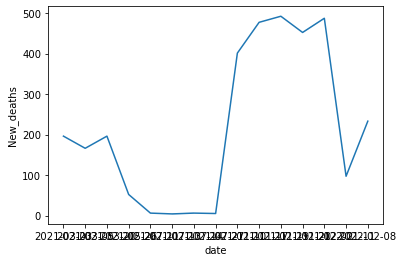

In [51]:
sns.lineplot(x=output1["date"], y=output1["New_deaths"])

In [17]:
# close connection
connection.close()